In [2]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot
from coffea.util import load, save

In [3]:
hists = load('purity2018.merged')

In [12]:
scale = {}
for d in hists['sumw2'].identifiers('dataset'):
    scale[d]=hists['sumw'].integrate('dataset', d).values(overflow='all')[()][1]
    
for d in hists['count'].identifiers('dataset'):
    if 'EGamma' in d.name: continue
    hists['count'].scale({d:1/scale[d]},axis='dataset')

In [13]:
process = hist.Cat("process", "Process", sorting='placement')
cats = ("dataset",)

bkg_map = OrderedDict()
data_map = OrderedDict()

data_map["EGamma"] = ("EGamma*", )

bkg_map["GJets"] = ("GJets*",)
bkg_map["QCD"] = ("QCD*",)

bkg = {}
data = {}

bkg['count'] = hists['count'].group(cats, process, bkg_map)
data['count'] = hists['count'].group(cats, process, data_map)

In [20]:
data['count'].identifiers('cat')

[<StringBin (medium) instance at 0x7fc335005c88>,
 <StringBin (medium_nosieie) instance at 0x7fc335005cc0>,
 <StringBin (medium_nosieie_invertiso) instance at 0x7fc335005cf8>]

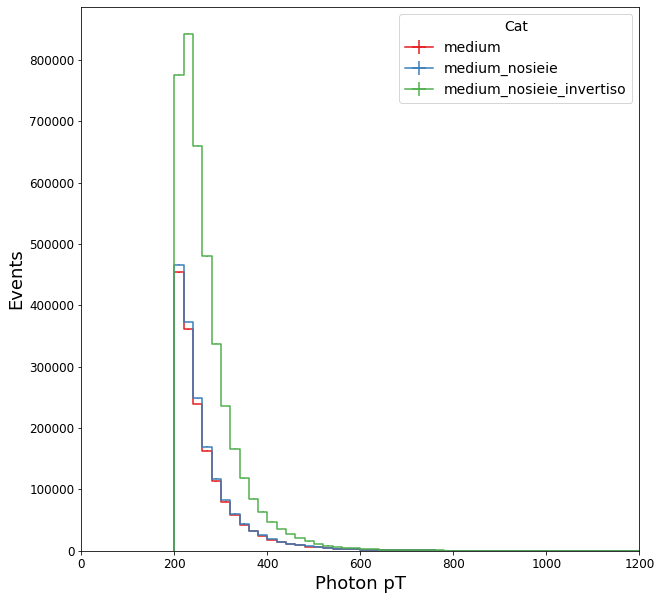

In [63]:
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}

#colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ff7f00']
colors = ['#e41a1c', '#377eb8', '#4daf4a']

fig, ax = plt.subplots(1, 1, figsize=(10,10))
fig.subplots_adjust(hspace=.07)
ax.set_prop_cycle(cycler(color=colors))
key = 'count'

plot.plot1d(data[key].integrate('process').sum('sieie'),           
            overlay='cat',    
            ax=ax,
            clear=False,
            #error_opts=data_err_opts
           )

#ax.set_yscale('log')

(0.0, 0.03)

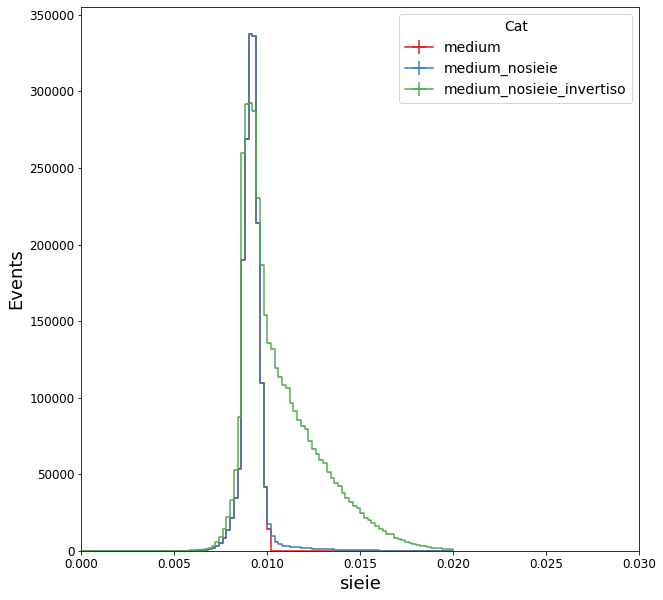

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
fig.subplots_adjust(hspace=.07)
ax.set_prop_cycle(cycler(color=colors))
colors = ['#e41a1c', '#377eb8', '#4daf4a']

plot.plot1d(data[key].integrate('process').sum('pt'),           
            overlay='cat',    
            ax=ax,
            clear=False,
            #error_opts=data_err_opts
           )

ax.set_xlim(0., 0.03)

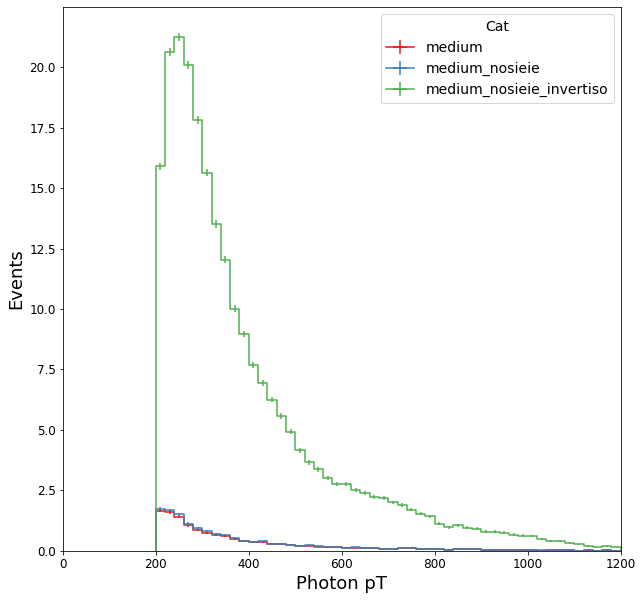

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
fig.subplots_adjust(hspace=.07)
ax.set_prop_cycle(cycler(color=colors))

plot.plot1d(bkg[key].integrate('process','QCD').sum('sieie'),           
            overlay='cat',    
            ax=ax,
            clear=False,
            #error_opts=data_err_opts
           )

(0.0, 0.03)

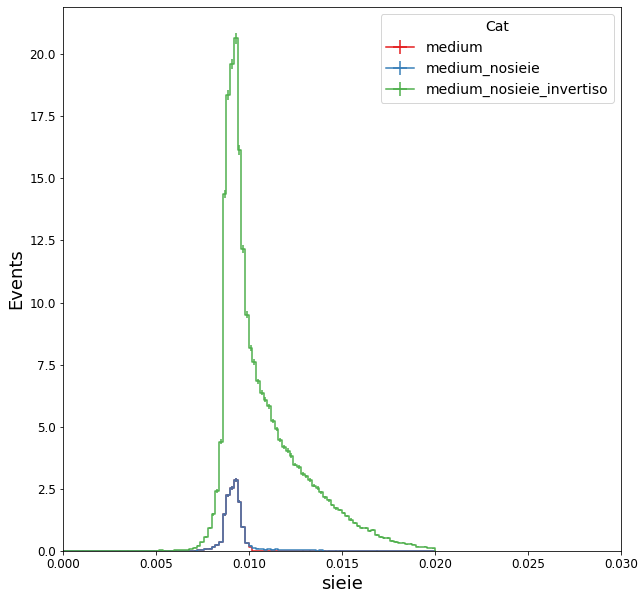

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
fig.subplots_adjust(hspace=.07)
ax.set_prop_cycle(cycler(color=colors))

plot.plot1d(bkg[key].integrate('process','QCD').sum('pt'),           
            overlay='cat',    
            ax=ax,
            clear=False,
            #error_opts=data_err_opts
           )

ax.set_xlim(0., 0.03)

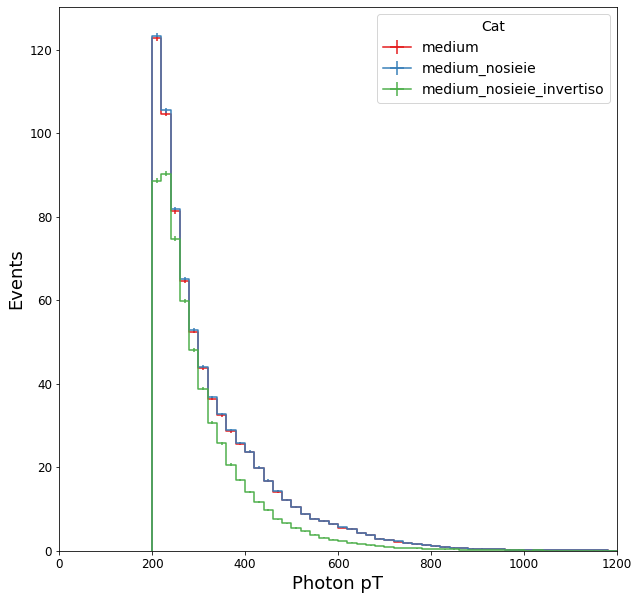

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
fig.subplots_adjust(hspace=.07)
ax.set_prop_cycle(cycler(color=colors))

plot.plot1d(bkg[key].integrate('process','GJets').sum('sieie'),           
            overlay='cat',    
            ax=ax,
            clear=False,
            #error_opts=data_err_opts
           )

(0.0, 0.03)

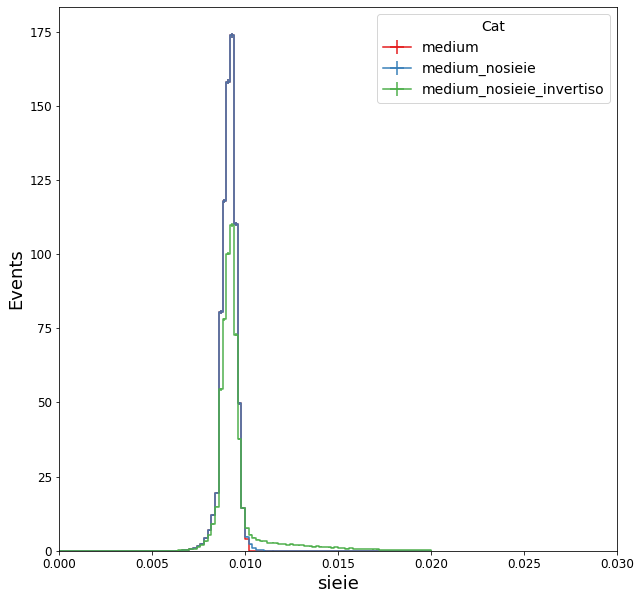

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
fig.subplots_adjust(hspace=.07)
ax.set_prop_cycle(cycler(color=colors))

plot.plot1d(bkg[key].integrate('process','GJets').sum('pt'),           
            overlay='cat',    
            ax=ax,
            clear=False,
            #error_opts=data_err_opts
           )

ax.set_xlim(0., 0.03)